# Stochastic motion in continuous space


## The Langevin equation

When considering Brownian motion in continuous time and space, a very useful physical model is provided by the *Langevin equation*. This is **stochastic differential equation** that includes deterministic and random forces to represent the motion of a particle suspended in a viscuous fluid:

$$\begin{equation}
m \frac{d \vec{v}}{d t}=-\xi \vec{v}+\vec{F}_{ext}+\vec{\theta}(t) \\
\end{equation}
$$(langevin)


It states that the acceleration on the particle is determined by three contributions:
- a frictional force with macroscopic friction coefficient $\xi$ 
- an external force acting on the particle (e.g. an electric field, the force of gravity, etc.)
- a micoscopic stochastic force \vec{\theta}$  defined by its first and second moments:

$$
\begin{aligned}
& \langle\vec{\theta}(t)\rangle=\overrightarrow{0} \\
& \left\langle\theta_{\alpha}(t) \theta_{\beta}\left(t^{\prime}\right)\right\rangle=2 \theta_{0} \delta_{\alpha \beta} \delta\left(t-t^{\prime}\right)
\end{aligned}
$$

The Langevin equation acts as a prototype for stochastic processes and allows us to explore various regimes.

### Free particle and fluctuation-dissipation relation




The first interesting  problem to address is the solution of the Langevin equation in the absence of external forces $F_{\rm ext}=0$.

$$\begin{equation}
m \frac{d \vec{v}}{d t}=-\xi \vec{v}+\vec{\theta}(t) \\
\end{equation}
$$(langevin)

The formal solution for a **free particle** (see Proof below) is

$$
\begin{equation}
\vec{v}(t)=e^{-\xi t/ m } \vec{v}(0)+\frac{1}{m} \int_{0}^{t} d s e^{-\xi (t-s)/m} \vec{\theta}(s)
\end{equation}
$$(free-langevin)


```{admonition} Proof
:class: proof dropdown

Since the particle is free

$$
\begin{equation}
\vec{F}_{\text {ext }}=\overrightarrow{0}
\end{equation}
$$

The Langevin equation eq.{eq}`langevin` reads 

$$\begin{equation}
\frac{d \bar{v}}{d t}=-\frac{\xi}{m} \vec{v}+\frac{1}{m} \vec{\theta}(t)
\end{equation}
$$

We treat this as a *stochastic differential equation*

$$
\begin{equation}
\begin{aligned}
& \frac{d x}{d t}=a x(t)+b(t) \\
& x(t)=e^{a t} y(t) \\
& a e^{a t} y(t)+e^{a t} \frac{d y}{d t}=a e^{a t} y(t)+b(t) \\
& \frac{d y}{d t}=e^{-a t} b(t) \\
& y(t)=\underbrace{y(0)}_{x(0)}+\int_0^t d s e^{-a s} b(s)
\end{aligned}
\end{equation}
$$

So 

$$
\begin{equation}
x(t)=e^{a t} x(0)+\int_0^t ds e^{-a(s-t)} b(s)
\end{equation}
$$

with

$$
\begin{equation}
a=-\frac{\xi}{m} \quad b=\frac{1}{m} \vec{\theta}
\end{equation}
$$

leading to 

$$
\begin{equation}
\vec{v}(t)=e^{-\xi / m t} \vec{v}(0)+\frac{1}{m} \int_{0}^{t} ds e^{-\xi / m(t-s)} \vec{\theta}(s)
\end{equation}
$$


```

It has two main ingredients:
- a **frictional damping** of the initial velocity due to the friction, which eventually vanishes to zero (the particle *forgets* about its initial velocity)
- a **memory effect** over the impulses received from the random force (the particle is constantly kicked in different directions and with different kick strengths).

A single realisation of the dynamics in Eq.{eq}`free-langevin` is as informative as a single random walker: its velocity at time $t$ depends specifically on the sequence fo steps that we have followed.

We can see this by solving numerical the equation using the simplest scheme, the **Euler-Maruyama** scheme: the particle velocities are updated after a (small compared to time-units set by the mass and the friction coefficient) time-step according to 

$$\begin{equation}
v_{t+\Delta t} = v_t - \dfrac{\xi}{m} v_t \Delta t+\dfrac{1}{m} \sqrt{2\theta_0\Delta t}
\end{equation}
$$

Notice how the random force contribution is calculated: the stochastic kicks are producing a random walk in velocity space, so their variance scales linearly with the timestep, so that the force itself scales as the **square root** of the timestep. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [15]:
def free_particle(v0, xi, theta0, steps, dt=0.01, m=1):
    """Implement Euler-Maruyama method for a free particle."""
    np.random.seed(10)
    v = np.zeros(steps)
    thetas = np.random.normal(0, np.sqrt(2 * theta0), steps)
    v[0] = v0
    for step in range(steps - 1):
        v[step + 1] = v[step] - xi / m * v[step] * dt + np.sqrt(dt) * thetas[step] / m
    t = np.arange(steps) * dt

    # calculate the discretised integral for the analytical result
    ds = dt
    s = np.copy(t)
    integral = np.zeros(steps)
    for i in range(steps):
        integral[i] = np.sum(
            np.exp(-xi * (t[i] - s[:i]) / m)
            * thetas[:i]
            * np.sqrt(ds)  # note that the time discretisation has a step of sqrt(dt)
        )
    analytical = v0 * np.exp(-xi * t / m) + integral / m

    return t, v, analytical


we can construct a convenient function for plotting as teh results for different values of the timestep and friction.

In [16]:
def plot_free_particle(dt, xi, theta0=0.1):
    t, vsim, vanalytical = free_particle(1, xi, theta0, 100, dt=dt)
    plt.figure(figsize=(4, 2))
    plt.plot(t, vsim, label="Simulation")
    plt.plot(t, vanalytical, label="Semi-Analytical")
    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.legend()
    plt.show()


For small timesteps, the simulation fllows closely the (semi)-analytical result.

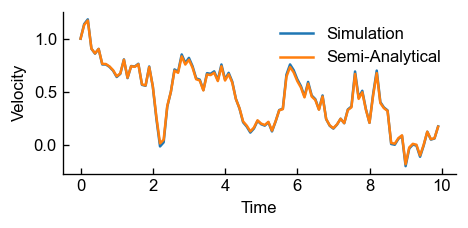

In [17]:
plot_free_particle(0.1, 0.5)


When the timestep is too large, the Euler-Maruyama solver is inaccurate.

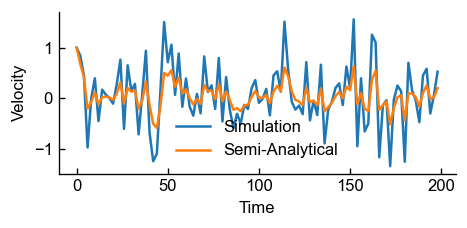

In [18]:
plot_free_particle(2.0, 0.5)


In an interactive session (e.g. `jupyter notebook`) you can run the following command to explore different regimes.

In [23]:
from ipywidgets import interact

interact(
    plot_free_particle, dt=(0.01, 2, 0.01), xi=(0.01, 1.5, 0.01), theta0=(0, 1, 0.1)
)


interactive(children=(FloatSlider(value=1.0, description='dt', max=2.0, min=0.01, step=0.01), FloatSlider(valu…

<function __main__.plot_free_particle(dt, xi, theta0=0.1)>


## Overdamped limit: back to Brownian dynamics

We simulate the overdamped Brownian dynamics

$$
\begin{equation}
\xi \frac{d\vec{r}}{dt} = \vec{\theta}(t) + \vec{F}(\vec{r})
\end{equation}
$$

of a colloidal particle under the influence of an external force $\vec{F}$ and compute its mean square displacement $\langle |\Delta \vec{r}(t)|^2\rangle$. As usual, several non-interacting particles are simulated in parallel to improve the statistics.  


In [ ]:
# Model parameters
npart = 1000
ndims = 1
friction = 1.0
k = 0.5
T = 1.0
dt = 0.04
nsteps = int(30.0 / dt)

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt) ** 0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
msd = []
for i in range(nsteps):
    # Store MSD
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        # force = - k * position
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, msd, "o", label="Simulation")
# Theoretical diffusive behavior (in the absence of external force)
plt.plot(time, 2 * ndims * D * time, "-", label="Theory")
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel("t")
plt.ylabel("MSD")
plt.legend()


**Exercise 1**: *drift-diffusion*

The Brownian particles are subject to a constant external force $F>0$ in one dimension. This will lead to a systematic drift in the motion of the particles.

1. Compute analytically the first two moments of the position, $\langle x(t)\rangle$ and $\langle x^2(t)\rangle$, and provide a physical interpretation of the results
2. Cross-check the results against the simulation data and plot the results in a double logarithmic scale. Identify the ballistic and the diffusive regime.

**Exercise 2**: *harmonic potential* 

Put the Brownian particles in a harmonic potential $U(x) = \frac{1}{2}kx^2$ in one dimension.

1. Check that $\langle |\Delta x(t)|^2\rangle$ is diffusive in the absence of external field but saturates to a finite value when the harmonic potential is switched on

2. Determine analytically the equilibrium value $\langle |\Delta x(t=\infty)|^2\rangle$ and compare it to the simulation data. Which factors control the relaxation time that describes the approach to equilibrium? 

**Exercise 3**: *thermally activated barrier crossing*

Study numerically the dynamics of a Brownian particle in a one-dimensional double well potential 

$$
U(x) = U_0 (1 - (x/a)^2)^2
$$

The initial position of the particle will be at the bottom of the left well: $x(t=0)=-a$. 

1. Choose a temperature $T > U_0$, for which barrier crossing is easy, and plot a single trajectory $x(t)$ over a sufficiently long time. What do you observe?
2. Reduce the temperature, $T < U_0$, and repeat the numerical experiment. What do you observe? 
3. Give the expression of the probability density $p(x)$ at equilibrium. Can you estimate the time needed to reach equilibrium? (simulate several independent particles in parallel)

In [ ]:
# Model parameters
npart = 1
ndims = 1
friction = 1.0
k = 0.5
T = 0.2
dt = 0.01
nsteps = int(1000.0 / dt)
D = T / friction
width = (2 * D * dt) ** 0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
pos = []
for i in range(nsteps):
    pos.append(position[0])  # numpy.sum(positions**2) / npart)
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # force = numpy.zeros(ndims)
        force = 4 * position * (1 - position**2)
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, pos, "o", label="Simulation")
plt.xlabel("t")


In [ ]:
# Double well potential
x = numpy.linspace(-1.5, 1.5, 100)
plt.plot(x, (1 - x**2) ** 2)


**Exercise 4**: *stochastic resonance*

Consider a Brownian particle in a double well potential
$$
U(x) = U_0 (1 - (x/a)^2)^2
$$
subject to an additional periodic force of the form
$$
F(x) = F_0 \sin(2\pi t/\tau)
$$
where $A$ is the forcing amplitude and $\tau$ is the forcing period. For convenience, set $U_0=1$ and $a=1$.

1. Use Kramers theory to estimate the relaxation time $\tau_K$ at $T=0.4$ *in the absence of forcing* ($A=0$).
2. Add a small forcing $F_0=10^{-1}$ and plot the trajectory of the Brownian particle $x(t)$ over a time much longer than $\tau_K$ in the following two cases: (i) $\tau > \tau_K$, (ii) $\tau < \tau_K$. What do you observe? 
3. Compare your results to the analysis of Benzi, Nonlin. Processes Geophys. 17, 431 (2010) (https://npg.copernicus.org/articles/17/431/2010/) and of Simon & Libchaber, Phys. Rev. Lett. 68, 3375 (1992) (https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.68.3375)

In [ ]:
import numpy
import matplotlib.pyplot as plt

# Model parameters
npart = 1
ndims = 1
friction = 1.0
k = 0.5
T = 0.4
dt = 0.04
nsteps = int(2000.0 / dt)
U_0 = 1
a = 1
A = 1e-1
tau = 100.0

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt) ** 0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
x = []
for i in range(nsteps):
    # Store MSD
    x.append(positions[0, 0])

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1 - (position / a) ** 2)
        force += A * numpy.sin(2 * numpy.pi * i * dt / tau)
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, x)
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel("t")


In [ ]:
import numpy
from random import random
from atooms.system.particle import Particle


class RandomWalk(object):
    def __init__(self, system, delta=1.0):
        self.system = system
        self.delta = delta

    def run(self, steps):
        for i in range(steps):
            for p in self.system.particle:
                dr = numpy.array([random() - 0.5, random() - 0.5, random() - 0.5])
                dr *= self.delta
                p.position += dr


In [ ]:
from atooms.system import System
from atooms.simulation import Simulation


system = System(N=1000)
L = 10
# for i in range(1000):
#     p = Particle(position=[L * random(), L * random(), L * random()])
#     system.particle.append(p)

simulation = Simulation(RandomWalk(system))

# We add a callback that computes the MSD every 10 steps
# We store the result in a dictionary passed to the callback
msd_db = {}


def cbk(sim, initial_position, db):
    msd = 0.0
    for i, p in enumerate(sim.system.particle):
        dr = p.position - initial_position[i]
        msd += numpy.sum(dr**2)
    msd /= len(sim.system.particle)
    db[sim.current_step] = msd


# We will execute the callback every 10 steps
simulation.add(
    cbk, 10, initial_position=[p.position.copy() for p in system.particle], db=msd_db
)
simulation.run(50)
# The MSD should increase linearly with time
time = sorted(msd_db.keys())


In [ ]:
msd_db


In [ ]:
simulation.system.particle[0].position


In [ ]:
class FastRandomWalk(RandomWalk):
    def run(self, steps):
        pos = self.system.view("pos")
        for k in range(steps):
            dr = numpy.random.uniform(-0.5, 0.5, size=pos.shape)
            pos += dr * self.delta


In [ ]:
simulation.backend = FastRandomWalk(System(N=1000))
# reset msd_db dictionary
msd_db.clear()
# run sim
simulation.run(100)

# The MSD should increase linearly with time
time = sorted(msd_db.keys())


In [ ]:
import matplotlib.pyplot as plt

plt.plot(msd_db.keys(), msd_db.values())


In [ ]:
msd_db
